<Figure size 432x288 with 0 Axes>

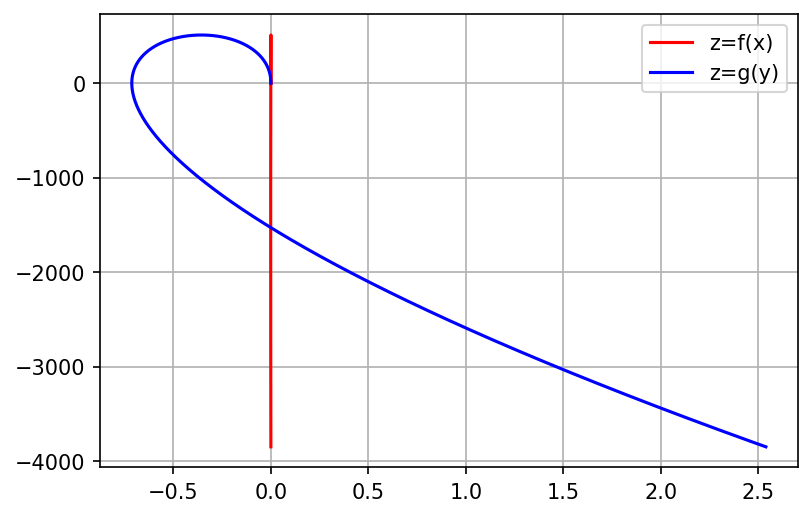

<Figure size 432x288 with 0 Axes>

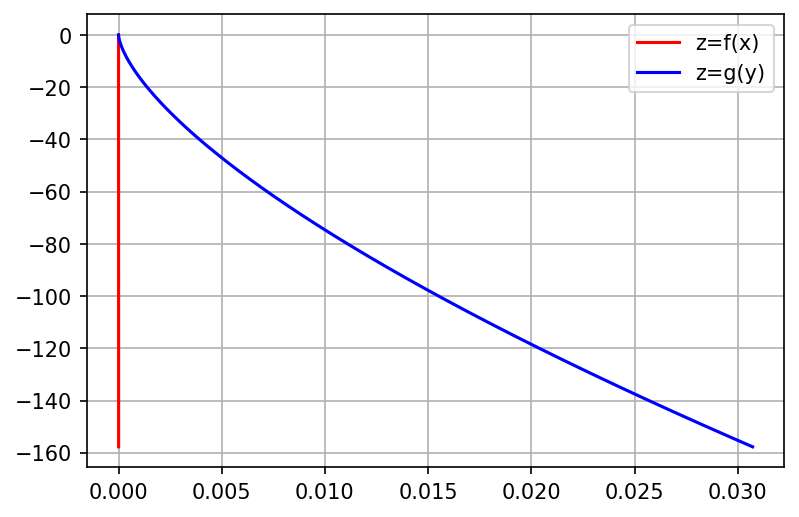

In [6]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

def zenith(l,v0,tf):
    # constantes terrestres
    g=9.81 ; Omega=7.29E-5
    # latitude lambda
    S=sin(l) ; C=cos(l)
    # discretisation
    n = 20000
    tau = tf/n
    # Initialisation des listes
    listet=np.zeros(1+n)
    listex=np.zeros(1+n) ; listevx=np.zeros(1+n) ; listeax=np.zeros(1+n)
    listey=np.zeros(1+n) ; listevy=np.zeros(1+n) ; listeay=np.zeros(1+n) ;
    listez=np.zeros(1+n) ; listevz=np.zeros(1+n) ; listeaz=np.zeros(1+n)
    # Conditions initiales
    listex[0]=0 ; listevx[0]=0
    listeax[0]=2*Omega*S*listevy[0]
    listey[0]=0 ; listevy[0]=0
    listeay[0]=-2*Omega*(S*listevx[0]+C*listevz[0])
    listez[0]=0 
    listevz[0]=v0
    listeaz[0]=-g+2*Omega*C*listevy[0]
    # Calcul des différentes variables en fonction du temps
    for i in range(1,1+n):
        listet[i]=i*tau
        listevx[i]=listevx[i-1]+tau*listeax[i-1] ; listex[i]=listex[i-1]+tau*listevx[i-1]
        listevy[i]=listevy[i-1]+tau*listeay[i-1] ; listey[i]=listey[i-1]+tau*listevy[i-1]
        listevz[i]=listevz[i-1]+tau*listeaz[i-1] ; listez[i]=listez[i-1]+tau*listevz[i-1]
        listeax[i]=2*Omega*S*listevy[i]
        listeay[i]=-2*Omega*(S*listevx[i]+C*listevz[i])
        listeaz[i]=-g+2*Omega*C*listevy[i]
    plt.clf()
    plt.figure(dpi=150)
    plt.plot(listex,listez,label="z=f(x)",color='r')
    plt.plot(listey,listez,label="z=g(y)",color='b')
    plt.grid(True)
    plt.legend()
    plt.show()
    return

mersenne = zenith(pi/4,100,40)

reich = zenith(pi/4,0,5.67)